In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, or_

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
session.query(Measurement.prcp).count()

19550

In [17]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [18]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_str = ''.join(last_date)
print(last_date_str)

2017-08-23


In [19]:
year_ago_date = dt.datetime.strptime(last_date_str,"%Y-%m-%d") - dt.timedelta(days=365)
year_ago_date = year_ago_date.strftime('%Y-%m-%d')
print(year_ago_date)

2016-08-23


In [20]:
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= year_ago_date).all()


In [21]:
#Unpacking the tuples and storing date and precipitation data in separate lists
prcp_date = [result[0] for result in results[:]]
prcp = [result[1] for result in results[:]]


In [22]:
#Loading results into pandas dataframe

prcp_df = pd.DataFrame(columns = {"Date", "Precipitation"})
prcp_df["Date"] = prcp_date
prcp_df["Precipitation"] = prcp


prcp_df.sort_values(by = "Date")
prcp_df.set_index("Date", inplace=True)

prcp_df = prcp_df.dropna(how = "any")
prcp_df["Precipitation"] = prcp_df["Precipitation"].multiply(other = 3)


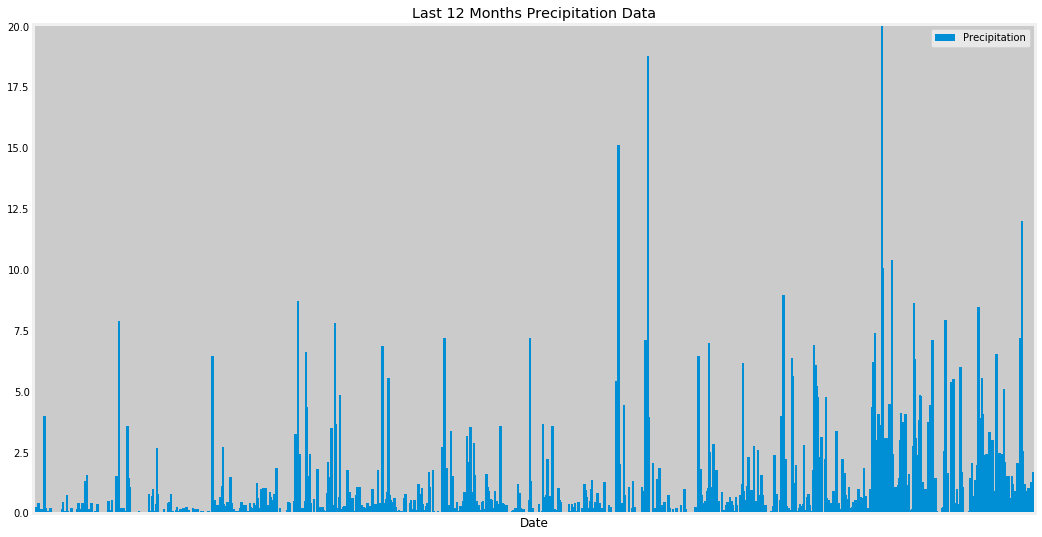

In [23]:
#Creating bar plot using plot function

prcp_chart = prcp_df.plot(kind = "bar", width = 5, figsize=(16,9), title = "Last 12 Months Precipitation Data")
prcp_chart.tick_params( axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim(0, max(prcp_df["Precipitation"]))
plt.grid(True)
plt.savefig("Images/PrcpDataForLast12Months.png")
plt.show()



In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.531836
std,1.383569
min,0.000000
25%,0.000000
50%,0.060000
75%,0.390000
max,20.100000


In [25]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
print(stations)

9


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = active_stations[0][0]
temp_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()
print(temp_data)

[(54.0, 85.0, 71.66378066378067)]


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(Measurement.tobs).\
filter(Measurement.date >= year_ago_date).filter(Measurement.station == most_active_station).all()
print(tobs_results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [29]:
#Unpacking the tuples and storing date and precipitation data in separate lists
tobs = [result[0] for result in tobs_results[:]]


In [33]:
#Loading results into pandas dataframe

tobs_df = pd.DataFrame(columns = {"Tobs"})
tobs_df["Tobs"] = tobs


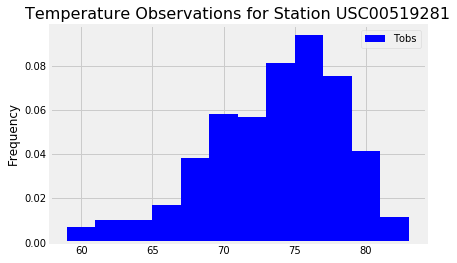

In [31]:
#Creating bar plot using plot function

tobs_df.hist(bins = 12,  density=True, facecolor='b', alpha=1, label='Tobs')
plt.ylabel("Frequency")
plt.title("Temperature Observations for Station " + active_stations[0][0], fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize= 10)
plt.savefig("Images/StationTemps.png")
plt.grid(True)
plt.show()

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
start_date = '2017-08-01'
end_date = '2017-08-23'
print(calc_temps(start_date, end_date))

[(70.0, 78.82417582417582, 85.0)]


In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

results = calc_temps(start_date, end_date)

trip_temp_df = pd.DataFrame(results, columns = {"Tavg", "Tmin","Tmax"})

print(trip_temp_df)

   Tavg       Tmin  Tmax
0  70.0  78.824176  85.0


In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avgTemp = trip_temp_df["Tavg"]

error = results[0][2] - results[0][0]
print(error)

15.0


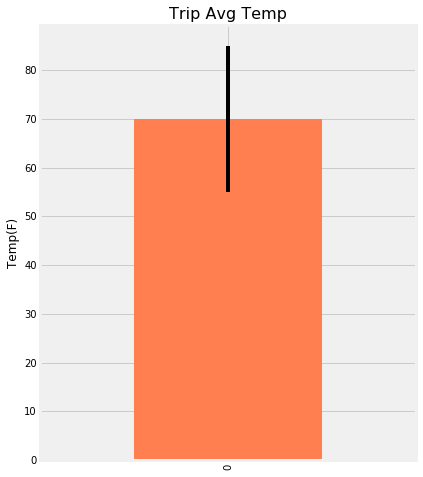

In [38]:
avgTemp_chart = avgTemp.plot(kind = "bar", yerr = error, figsize=(6,8), color = 'coral')
avgTemp_chart.set_title("Trip Avg Temp", fontsize = 16)
avgTemp_chart.set_ylabel("Temp(F)")
plt.savefig("Images/TripAvgTemp.png")
plt.show()

In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

q = session.query(*sel).filter(Station.station == Measurement.station).\
filter(Measurement.date <= end_date).\
filter(Measurement.date >= start_date).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

for i in q: 
    print(i[0],"\t",i[1], "\t", i[2], "\t", i[3], "\t", i[4],"\t", i[5])

USC00516128 	 MANOA LYON ARBO 785.2, HI US 	 21.3331 	 -157.8025 	 152.4 	 3.85
USC00519281 	 WAIHEE 837.5, HI US 	 21.45167 	 -157.84888999999998 	 32.9 	 0.5700000000000001
USC00514830 	 KUALOA RANCH HEADQUARTERS 886.9, HI US 	 21.5213 	 -157.8374 	 7.0 	 0.36000000000000004
USC00519523 	 WAIMANALO EXPERIMENTAL FARM, HI US 	 21.33556 	 -157.71139 	 19.5 	 0.34
USC00519397 	 WAIKIKI 717.2, HI US 	 21.2716 	 -157.8168 	 3.0 	 0.06


## Optional Challenge Assignment

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-04-01'
end_date = '2017-04-10'

# Use the start and end date to create a range of dates
trip_dates = session.query(Measurement.date).filter(Measurement.date>=start_date).\
filter(Measurement.date<=end_date).group_by(Measurement.date).all()


#Unpacking the tuples and storing date in separate lists
t_date = [result[0] for result in trip_dates[:]]

normals = []
for date in t_date:
    t_month_day = func.strftime("%m-%d", date)
    dn_results = daily_normals(t_month_day)

    for result in dn_results[:]:
        normals.append(result)

xmin = []
xavg = []
xmax = []
for x in normals:
    tmin = x[0]
    tavg = x[1]
    tmax = x[2]
    xmin.append(tmin)
    xavg.append(tavg)
    xmax.append(tmax)



In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_details_df = pd.DataFrame(columns = {"Date","tmin", "tavg", "tmax"}) 


trip_details_df["Date"] = t_date
trip_details_df["tmin"] = xmin
trip_details_df["tavg"] = xavg
trip_details_df["tmax"] = xmax

trip_details_df.set_index("Date", inplace=True)
trip_details_df



,tmax,tmin,tavg
Date,,,
2017-04-01,80.0,60.0,71.879310
2017-04-02,79.0,53.0,71.821429
2017-04-03,78.0,55.0,72.228070
2017-04-04,78.0,58.0,72.016393
2017-04-05,80.0,61.0,72.288136
2017-04-06,77.0,67.0,71.571429
2017-04-07,78.0,63.0,71.105263
2017-04-08,77.0,66.0,72.105263
2017-04-09,78.0,62.0,71.614035


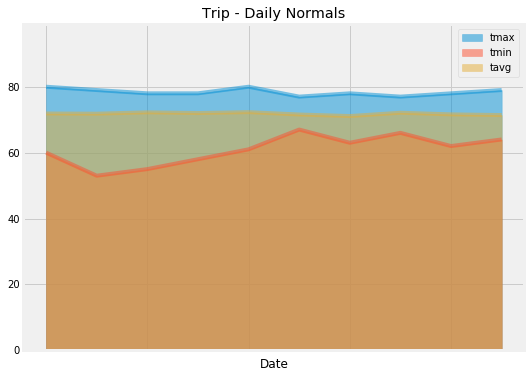

In [43]:
# Plot the daily normals as an area plot with `stacked=False`

dn_areaplot = trip_details_df.plot.area(stacked = False, figsize=(8,6))
plt.ylim(0, (tmax)+20)




plt.title(f"Trip - Daily Normals")


plt.savefig("Images/trip_dailynormals.png")

plt.show()